## Estadistica Aplicada
Sesión 6-24 agosto

Francisco Javier Chávez Hernández 2034204

Gpo 44

In [11]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#librerias especializadas
import statsmodels.formula.api as smf

In [10]:
pip install statsmodels


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 9.2/9.2 MB 9.1 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 4.8 MB/s eta 0:00:00


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Collecting openpyxl
     -------------------------------------- 250.0/250.0 kB 1.9 MB/s eta 0:00:00




[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
datos=pd.read_excel('modelolineal.xlsx')

In [13]:
datos=datos[['X','Y']]

In [14]:
datos.describe()

,X,Y
count,30.000000,30.000000
mean,17.333333,19.038965
std,8.372094,5.689742
min,0.000000,6.808838
25%,12.250000,14.128834
50%,19.000000,19.937977
75%,23.000000,24.151130
max,29.000000,28.422786


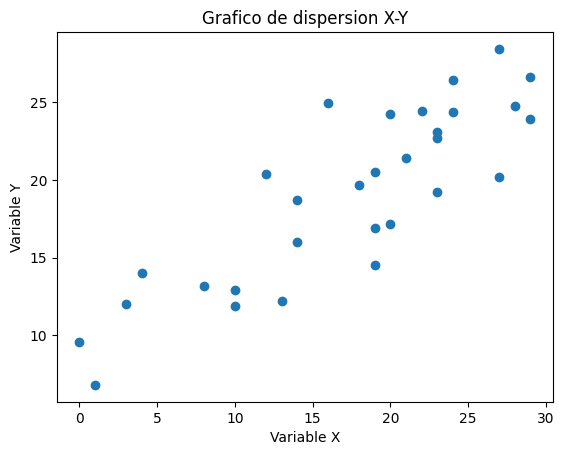

In [15]:
## Esploracion visual
plt.scatter(datos['X'], datos['Y'])
plt.title('Grafico de dispersion X-Y')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

El grafico de dispersion muestra una relacion lineal de X-Y por tanto tiene sentido estimar un modelo de MCO

In [17]:
##Estimar modelo
#1. Especificar el modelo
reg=smf.ols(formula='Y~X', data=datos)
#2. Estimar el modelo
results=reg.fit()
#3. Decir a python que nos lo muestre
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        11:31:06   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

VALIDACION CRUZADA
R^2
MAD=(1/n)*SUM(Y-Y^)
MAPE=(1/n)*SUM((Y-Y^^)/Y)
MSD=(1/n)*SUM(Y-Y^)^2

In [18]:
##calcular MAD
#1ero calcular la Y estimada
datos['Y_hat']=results.predict(datos['X'])

In [19]:
datos.head()

,X,Y,Y_hat
0,23,19.246957,22.333385
1,19,16.878501,20.007912
2,27,20.187237,24.658857
3,13,12.176789,16.519703
4,21,21.420112,21.170648


In [21]:
datos['X2']=datos['X']**2

In [22]:
#MAD
MAD_m1=(datos['Y']-datos['Y_hat']).abs().mean()

In [23]:
MAD_m1

2.3543034803789946

Estimar $ Y=\beta_0 + \beta_1 X +\beta_2X^2 $

In [24]:
#especificatr modelo
reg2=smf.ols(formula='Y~X+X2', data=datos)

#estimamos
results2=reg2.fit()

#mostramos
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     36.85
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.92e-08
Time:                        11:31:59   Log-Likelihood:                -74.475
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      27   BIC:                             159.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8518      1.790      4.945      0.0

In [25]:
datos['Y_hat2']=results2.predict(datos[['X', 'X2']])

In [26]:
datos.head()

,X,Y,Y_hat,X2,Y_hat2
0,23,19.246957,22.333385,529,22.340436
1,19,16.878501,20.007912,361,20.049010
2,27,20.187237,24.658857,729,24.608946
3,13,12.176789,16.519703,169,16.568905
4,21,21.420112,21.170648,441,21.197588


In [27]:
MAD_m2=(datos['Y']-datos['Y_hat2']).abs().mean()

In [28]:
print(MAD_m1.round(3),MAD_m2.round(3))

2.354 2.355


De acuerdo con el MAD el mejor modelo es el 1 $ Y=\beta_0 + \beta_1 X  $

## Validacion Cruzada

In [32]:
datos=pd.read_excel('modelolineal.xlsx')
datos=datos[['X','Y']]

In [33]:
#Definir el conjunto de entrenamiento
train_set=datos.iloc[:20]
#Definir el conjunto de evaluación
test_set=datos.loc[20:]

In [37]:
#estimamos modelo con conj entrenamiento
reg3=smf.ols(formula='Y~X', data=train_set)

#estimacion
results3=reg3.fit()

#mostrar modelo
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     28.80
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           4.23e-05
Time:                        11:55:22   Log-Likelihood:                -51.332
No. Observations:                  20   AIC:                             106.7
Df Residuals:                      18   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2336      2.008      4.598      0.0

In [39]:
results3.params[1]

0.5441903879851915

In [41]:
#evaluamos el modelo con el conjunto de evaluacion 
test_set['Y_hat']=results3.params[0]+results3.params[1]*test_set['X']

C:\Users\Dell\AppData\Local\Temp\ipykernel_3640\3710204190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat']=results3.params[0]+results3.params[1]*test_set['X']


In [43]:
#Calcular MAD
MAD_ts1=(test_set['Y']-test_set['Y_hat']).abs().mean()

In [44]:
MAD_ts1

2.107953156470991

In [45]:
#Crear el cuadrado
train_set['X2']=train_set['X']**2
test_set['X2']=test_set['X']**2

#estimar y=b+b1x+b2x2
reg4=smf.ols(formula='Y~X+X2', data=train_set)
results4=reg4.fit()

#calculamos estimado
test_set['Y_hat2']=results4.params[0]+results4.params[1]*test_set['X']+results4.params[2]*test_set['X2']

#calculamos MAD
MAD_ts2=(test_set['Y']-test_set['Y_hat2']).abs().mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3640\3481928554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['X2']=train_set['X']**2
C:\Users\Dell\AppData\Local\Temp\ipykernel_3640\3481928554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['X2']=test_set['X']**2
C:\Users\Dell\AppData\Local\Temp\ipykernel_3640\3481928554.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [46]:
print(MAD_ts1.round(3),MAD_ts2.round(3))

2.108 2.334


$ Y=\beta_0 + \beta_1 X $ es mejor modelo que $ Y=\beta_0 + \beta_1 X +\beta_2X^2$ de acuerdo a MAD y utilizando validación cruzada